In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ranksums
from adjustText import adjust_text
import math

In [6]:
df=pd.DataFrame()
data=pd.read_csv(f"/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/RB1CC1_normalized_to_FIP200/csv/de_Jan_3E_vs_HA.csv")
index_list=data["Gene Symbol"].tolist()

df.index=index_list
df.index.name = 'gene_symbol'

for name in ["de_Jan_deltaC_vs_S3","de_Jan_3E_vs_S3","de_Jan_WT_vs_S3"]:
    data=pd.read_csv(f"/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/RB1CC1_normalized_to_FIP200/csv/{name}.csv")

    data["gene_symbol"]= data["Gene Symbol"]
    data[f'nlog10_{name}'] = (data.pvalue)
    data[f'log2fc_{name}'] = data['log2fc']

    df = pd.merge(df, data[[f'gene_symbol', f'log2fc_{name}', f'nlog10_{name}']], on='gene_symbol', how='left')

df.set_index('gene_symbol', inplace=True)

In [7]:
df.columns

Index(['log2fc_de_Jan_deltaC_vs_S3', 'nlog10_de_Jan_deltaC_vs_S3',
       'log2fc_de_Jan_3E_vs_S3', 'nlog10_de_Jan_3E_vs_S3',
       'log2fc_de_Jan_WT_vs_S3', 'nlog10_de_Jan_WT_vs_S3'],
      dtype='object')

In [8]:
from matplotlib.colors import LinearSegmentedColormap
custom_palette = sns.color_palette("rocket", as_cmap=True)

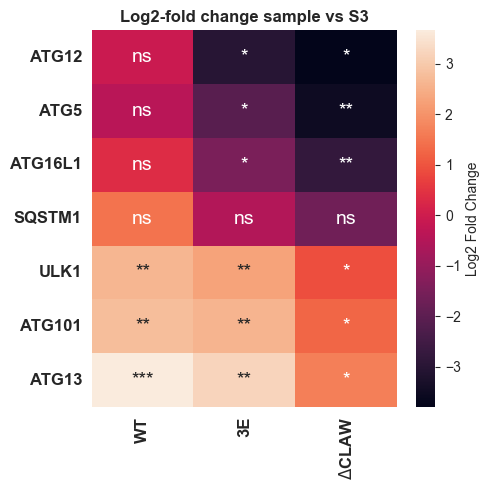

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom palette
custom_palette = sns.color_palette("rocket", as_cmap=True)

# Reorder logfc and pvalue columns
logfc_new_order = ["log2fc_de_Jan_WT_vs_S3", "log2fc_de_Jan_3E_vs_S3", "log2fc_de_Jan_deltaC_vs_S3"]
pvalue_new_order = ["nlog10_de_Jan_WT_vs_S3", "nlog10_de_Jan_3E_vs_S3", "nlog10_de_Jan_deltaC_vs_S3"]

df_logfc = df[logfc_new_order]
df_pvalue = df[pvalue_new_order]

# Filter the indices that exist in both dataframes
genes = ["ATG13", "ATG12", "ATG16L1", "ATG101", "ATG5", "ATG8", "ATG9", "ULK1", "MAP1LC3B", "SQSTM1", "NBR1"]
existing_indices = [gene for gene in genes if gene in df_logfc.index]
logfc_data_to_map = df_logfc.loc[existing_indices]
logfc_data_to_map = logfc_data_to_map.sort_values("log2fc_de_Jan_deltaC_vs_S3", ascending=True)
pvalue_data_to_map = df_pvalue.loc[existing_indices].reindex(logfc_data_to_map.index)

# Function to convert p-values to significance stars
def pvalue_to_stars(p_value):
    if p_value < 0.0001:
        return "****"
    elif p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    else:
        return "ns"

# Apply the function to the p-value DataFrame
star_annotations = pvalue_data_to_map.applymap(pvalue_to_stars)

# Create the heatmap
plt.figure(figsize=(5, 5))
ax = sns.heatmap(logfc_data_to_map, annot=star_annotations, fmt='', cmap=custom_palette,
                 cbar_kws={'label': 'Log2 Fold Change'}, annot_kws={'fontsize': 14})

# Customize the plot
x_ticks = ["WT","3E", r'$\Delta$CLAW']  # Add this line to define x_ticks
ax.set_xticklabels(x_ticks, fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}, rotation=90)
ax.set_ylabel("", fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'}, rotation=0)
plt.title('Log2-fold change sample vs S3', fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'})
plt.tight_layout()
plt.savefig("/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/heatmaps/log2_fold_S3_P_VALUES_normalised_FIP200_SAMPLE", dpi=1000)
plt.show()


Text(0.5, 1.0, 'Protein Abundance, sum normalised')

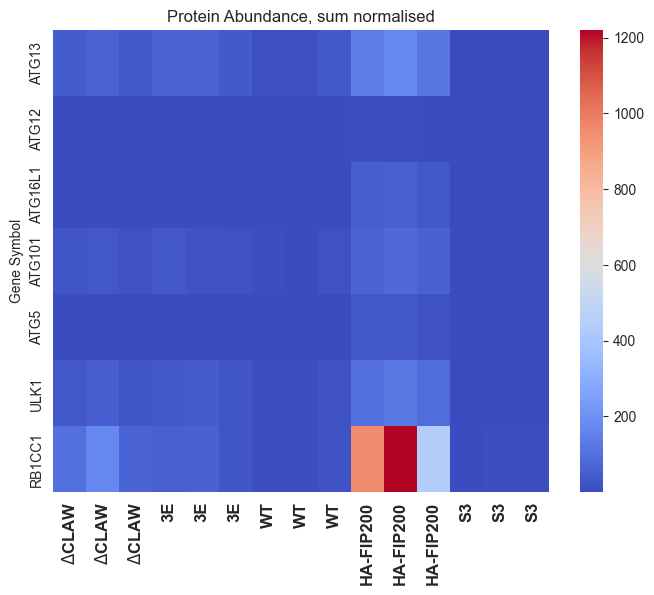

In [195]:
heatmap_data=pd.read_csv("/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/sum_normalized/Jan_normalized.csv")
heatmap_data.set_index('Gene Symbol', inplace=True)
heatmap_data=heatmap_data.iloc[:, :-1]
list=["ATG13", "ATG12","ATG16L1","ATG9a","ATG101","ATG5","ATG8","ULK1","RB1CC1"]

new_order = ['Abundance: F10: Sample, deltaC', 'Abundance: F11: Sample, deltaC', 'Abundance: F12: Sample, deltaC',
             "Abundance: F7: Sample, 3E","Abundance: F8: Sample, 3E","Abundance: F9: Sample, 3E",
             "Abundance: F13: Sample, WT","Abundance: F14: Sample, WT","Abundance: F15: Sample, WT",
             "Abundance: F4: Sample, HA","Abundance: F5: Sample, HA","Abundance: F6: Sample, HA",
             "Abundance: F1: Sample, S3","Abundance: F2: Sample, S3","Abundance: F2: Sample, S3"]

x_ticks=[r'$\Delta$CLAW',r'$\Delta$CLAW', r'$\Delta$CLAW',"3E","3E","3E","WT","WT","WT","HA-FIP200","HA-FIP200","HA-FIP200", "S3", "S3", "S3"]

# Reorder columns using indexing
heatmap_data = heatmap_data[new_order]

existing_indices = [index for index in list if index in heatmap_data.index]
plt.figure(figsize = (8,6))

ax=sns.heatmap(heatmap_data.loc[existing_indices], annot=False, cmap='coolwarm')

ax = plt.gca()

ax.set_xticklabels(x_ticks, fontdict={'fontname': 'Arial', 'fontsize': 12, 'fontweight': 'bold'},
                           rotation=90)
plt.title('Protein Abundance, sum normalised')

Text(0.5, 1.0, 'Protein Abundance, Normalised to FIP200')

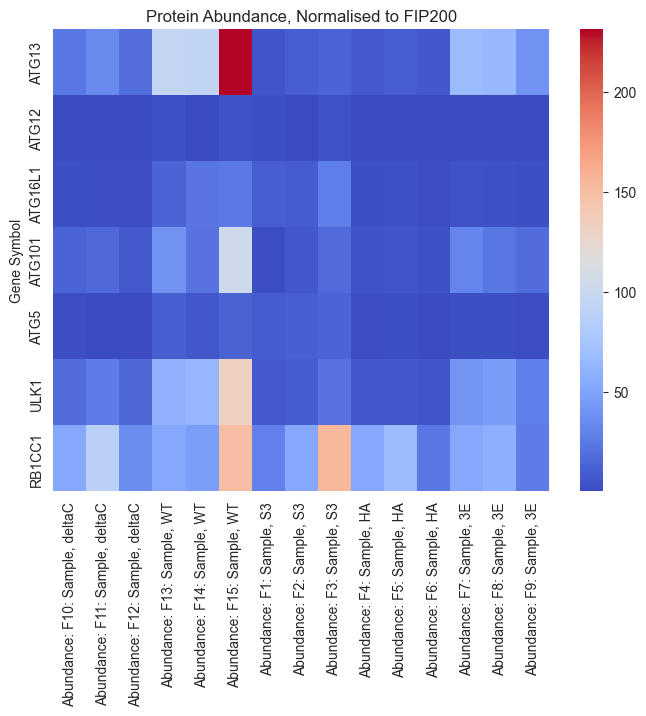

In [194]:
heatmap_data=pd.read_csv("/Users/janmatthias/Library/Mobile Documents/com~apple~CloudDocs/Master Thesis/proteomics/RB1CC1_normalized/Jan_normalized.csv")
heatmap_data.set_index('Gene Symbol', inplace=True)
heatmap_data=heatmap_data.iloc[:, :-1]
list=["ATG13", "ATG12","ATG16L1","ATG9a","ATG101","ATG5","ATG8","ULK1","RB1CC1"]

existing_indices = [index for index in list if index in heatmap_data.index]
plt.figure(figsize = (8,6))
sns.heatmap(heatmap_data.loc[existing_indices], annot=False, cmap='coolwarm')
plt.title('Protein Abundance, Normalised to FIP200')